In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\kami\Downloads\movies.csv')

In [11]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [12]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [21]:
# Data Types for our columns

print(df.dtypes)

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object


In [15]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [57]:
df['yearcorrect']=df['released'].astype(str).str[:4]
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime yearcorrect  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0        1705    14  
1   327       55   4500000.0   58853106.0      731    104.0        1492    13  
2  1745       55  18000000.0  538375067.0     1540    124.0        1771    14  
3  2246       55   3500000.0   83453539.0     1812     88.0        1492    13  
4   410       55   6000000.0   39846344.0     1777     98.0        1543    13

In [23]:
df.sort_values(by=['gross'],inplace=False, ascending=False)

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   
...                                 ...    ...        ...            ...   
7663   October 23, 2020 (United States)    3.1       18.0  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36.0   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29.0   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        NaN  James Randall   
7667    August 19, 2020 (United States)    5.7        7.0   Pereko Mosia   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
...                  ...                ...            ...          ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000.0   
7664         Lisa Huston   Michael Saquella  United States          NaN   
7665        Lynno Lovert       Onyama Laura  United States      58750.0   
7666       James Randall      Christina Roz  United States      15000.0   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          NaN   

             gross                    company  runtime yearcorrect  
5445  2.847246e+09      Twentieth Century Fox    162.0        Dece  
7445  2.797501e+09             Marvel Studios    181.0        Apri  
3045  2.201647e+09      Twentieth Century Fox    194.0        Dece  
6663  2.069522e+09                  Lucasfilm    138.0        Dece  
7244  2.048360e+09             Marvel Studios    149.0        Apri  
...            ...                        ...      ...         ...  
7663           NaN                        NaN     90.0        Octo  
7664           NaN  Cactus Blue Entertainment     90.0        Febr  
7665           NaN           Embi Productions      NaN        Apri  
7666           NaN                        NaN    120.0        Octo  
7667           NaN                PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [25]:
pd.set_option('display.max_rows',None)

In [27]:
#drop any dulicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<AxesSubplot:xlabel='gross', ylabel='budget'>

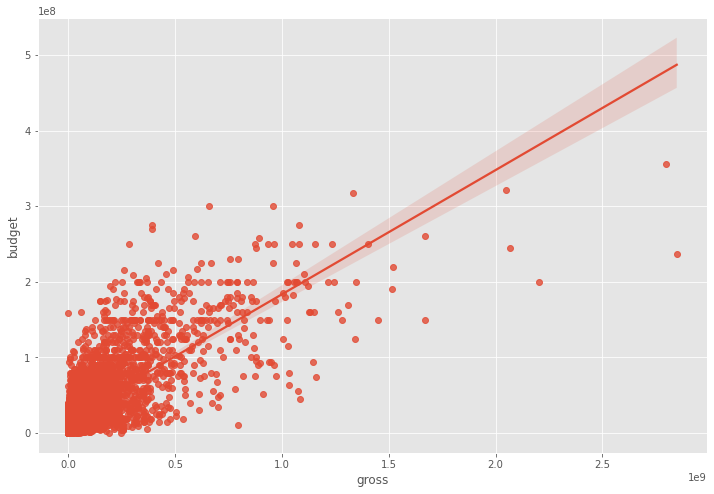

In [28]:
sns.regplot(x="gross", y="budget", data=df)

<AxesSubplot:xlabel='score', ylabel='gross'>

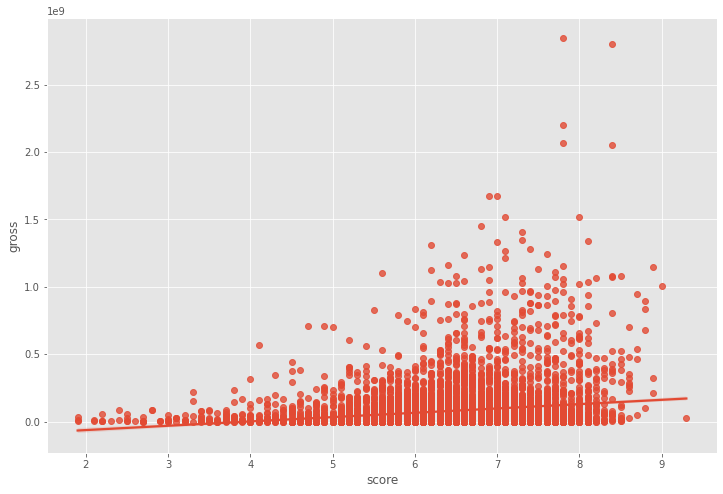

In [29]:
sns.regplot(x="score", y="gross", data=df)

In [30]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [31]:
df.corr(method ='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000

In [32]:
df.corr(method ='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000

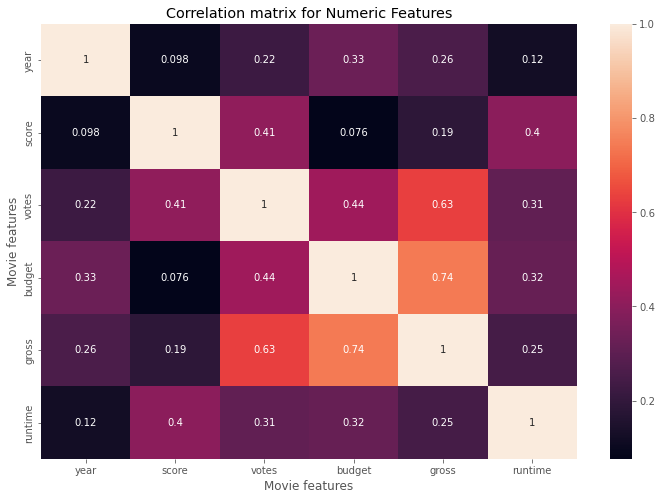

In [33]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [58]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime yearcorrect  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0        1705    14  
1   327       55   4500000.0   58853106.0      731    104.0        1492    13  
2  1745       55  18000000.0  538375067.0     1540    124.0        1771    14  
3  2246       55   3500000.0   83453539.0     1812     88.0        1492    13  
4   410       55   6000000.0   39846344.0     1777     98.0        1543    13

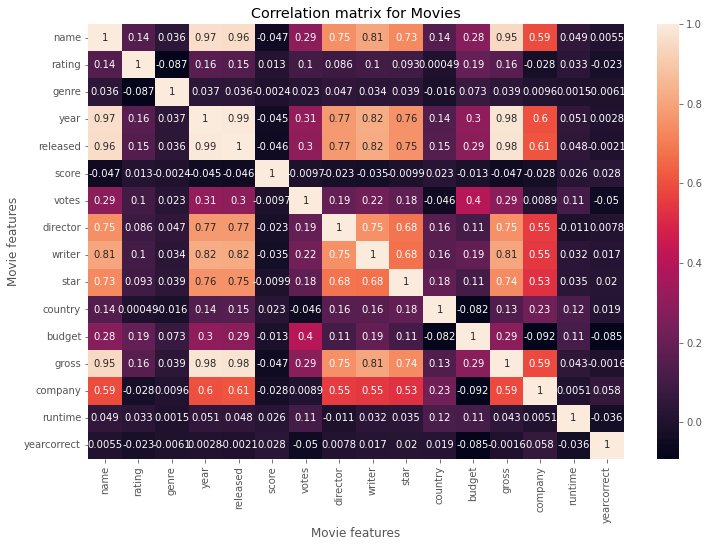

In [35]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [38]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating         0.143938
             genre          0.036367
             year           0.965761
             released       0.959015
             score         -0.046733
             votes          0.287776
             director       0.745905
             writer         0.805211
             star           0.731565
             country        0.142828
             budget         0.277488
             gross          0.947324
             company        0.591667
             runtime        0.048955
             yearcorrect    0.005512
rating       name           0.143938
             rating         1.000000
             genre         -0.086723
             year           0.156713
             released       0.146606
             score          0.012595
             votes          0.099972
             director       0.085520
             writer         0.103623
             star           0.093116
             country        0.000494
 

In [39]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

company      budget        -0.092249
budget       company       -0.092249
genre        rating        -0.086723
rating       genre         -0.086723
yearcorrect  budget        -0.085382
budget       yearcorrect   -0.085382
country      budget        -0.082082
budget       country       -0.082082
yearcorrect  votes         -0.050240
votes        yearcorrect   -0.050240
gross        score         -0.047041
score        gross         -0.047041
name         score         -0.046733
score        name          -0.046733
votes        country       -0.045914
country      votes         -0.045914
score        released      -0.045761
released     score         -0.045761
year         score         -0.044981
score        year          -0.044981
yearcorrect  runtime       -0.036201
runtime      yearcorrect   -0.036201
writer       score         -0.034685
score        writer        -0.034685
             company       -0.028432
company      score         -0.028432
rating       company       -0.028035
c

In [40]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star         company        0.527116
company      star           0.527116
writer       company        0.546151
company      writer         0.546151
             director       0.552258
director     company        0.552258
company      gross          0.588156
gross        company        0.588156
name         company        0.591667
company      name           0.591667
             year           0.601571
year         company        0.601571
released     company        0.607954
company      released       0.607954
writer       star           0.675685
star         writer         0.675685
             director       0.682385
director     star           0.682385
star         name           0.731565
name         star           0.731565
gross        star           0.735680
star         gross          0.735680
name         director       0.745905
director     name           0.745905
             writer         0.748340
writer       director       0.748340
gross        director       0.750911
d

In [41]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [59]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime yearcorrect  Year  
0  1047       54  19000000.0   46998772.0     2319    146.0        1705  1705  
1   327       55   4500000.0   58853106.0      731    104.0        1492  1492  
2  1745       55  18000000.0  538375067.0     1540    124.0        1771  1771  
3  2246       55   3500000.0   83453539.0     1812     88.0        1492  1492  
4   410       55   6000000.0   39846344.0     1777     98.0        1543  1543

In [61]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company year              
-1      1983  5.563663e+06
        1984  2.687148e+06
        1986  3.102082e+06
        1989  6.693304e+06
        1990  1.510053e+06
        2010  0.000000e+00
        2019  1.030470e+05
        2020  2.581888e+07
 0      2003  4.435093e+07
 1      2019  1.934575e+08
 2      1996  1.058000e+04
 3      2000  1.196218e+06
 4      2010  8.149060e+05
 5      2002  6.479328e+06
 6      2009  2.667600e+04
        2016  3.683720e+05
 7      2000  2.546100e+04
 8      1996  1.298324e+08
        1999  8.742386e+07
 9      1983  1.223263e+07
 10     2003  4.928883e+06
 11     2017  4.065640e+07
 12     2014  5.883438e+07
 13     1995  4.686937e+06
 14     2002  2.643490e+05
 15     2019  1.228104e+08
 16     2007  2.278398e+07
 17     2004  6.942439e+07
 18     2020  1.111055e+08
 19     2014  4.129632e+07
        2018  4.114238e+07
 20     1989  3.953745e+06
        1990  7.658401e+06
 21     1994  1.702394e+06
 22     2002  2.393206e+07
 23     2009  2.045887e+07
 24     2007  7.248490e+06
        2008  2.870518e+07
        2014  5.092129e+06
 25     2016  6.781500e+05
        2018  1.977444e+08
 26     1996  6.020933e+07
        1997  7.581243e+07
        2001  7.118650e+07
        2010  6.496260e+05
        2013  3.909596e+06
        2014  1.614593e+08
        2015  3.660674e+07
        2019  2.238656e+07
 27     1999  8.408835e+06
 28     2013  3.114953e+06
        2017  5.042014e+06
 29     2007  9.669758e+06
 30     1998  1.960216e+06
        1999  9.244200e+04
 31     1999  0.000000e+00
        2003  1.679990e+05
 32     2001  4.760014e+06
 33     2006  1.297260e+06
 34     1999  1.339493e+08
 35     1986  7.137502e+06
        1989  3.729544e+07
        1995  1.540344e+07
        1999  3.457378e+07
        2000  2.772812e+07
        2004  1.526951e+06
 36     1999  6.027900e+04
 37     2007  9.580292e+07
 38     2001  2.708110e+05
 39     1999  2.061280e+05
 40     1987  5.195960e+05
        2000  3.033646e+06
 41     2019  3.890100e+04
 42     2012  1.944287e+06
 43     1990  1.000597e+07
 44     1990  2.019659e+08
 45     2003  5.141166e+06
 46     2002  8.069354e+07
 47     1995  3.734870e+06
        1996  4.962000e+04
        2002  1.494615e+07
 48     2010  3.843774e+06
 49     2012  2.381282e+07
 50     2007  1.856990e+05
 51     1984  1.455045e+06
        1985  1.029760e+07
        1986  1.343181e+07
        1988  1.610040e+05
        1989  8.247542e+06
        1991  3.096400e+04
        1992  1.526697e+06
        1993  2.000678e+06
 52     1991  4.532791e+06
 53     2014  3.686941e+07
        2016  7.255141e+07
        2018  2.365046e+07
        2019  7.072870e+07
 54     2018  3.374801e+07
 55     1985  6.565359e+06
 56     1982  4.074301e+07
        1983  3.561561e+07
        1984  2.663282e+07
        1985  2.665753e+07
        1986  9.697739e+06
 57     1996  1.710027e+07
 58     2019  2.711010e+05
 59     1984  1.525532e+06
 60     1990  3.496180e+05
 61     2016  3.166892e+07
 62     2016  3.971200e+07
        2017  5.393930e+07
 63     2005  1.269364e+07
 64     1989  6.787800e+04
 65     1984  5.206679e+07
        1998  1.263279e+06
        1999  1.632567e+06
 66     2018  6.799934e+07
 67     2013  1.749682e+07
 68     1995  2.288000e+05
        1999  0.000000e+00
 69     1998  0.000000e+00
        1999  2.930920e+05
        2000  6.072616e+07
 70     1996  3.828405e+06
        1998  7.120568e+06
        2001  6.781952e+06
        2016  6.953604e+06
 71     2014  2.541915e+07
 72     2007  7.199680e+05
 73     2019  3.526126e+07
 74     1980  2.144878e+07
        1981  2.524463e+07
        1982  1.325358e+07
 75     2001  1.724806e+06
        2007  2.189737e+07
        2012  5.277766e+06
        2016  3.037236e+08
 76     2000  2.248346e+08
        2005  1.941371e+08
        2006  1.782816e+08
 77     1989  3.169719e+06
 78     1986  4.418630e+05
        1987  3.685862e+06
 79     2008  8.706693e+07
 80     2001  3.840980e+05
 81     1994  0.000000e+00
        1997  1.092300e+0

In [45]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [46]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

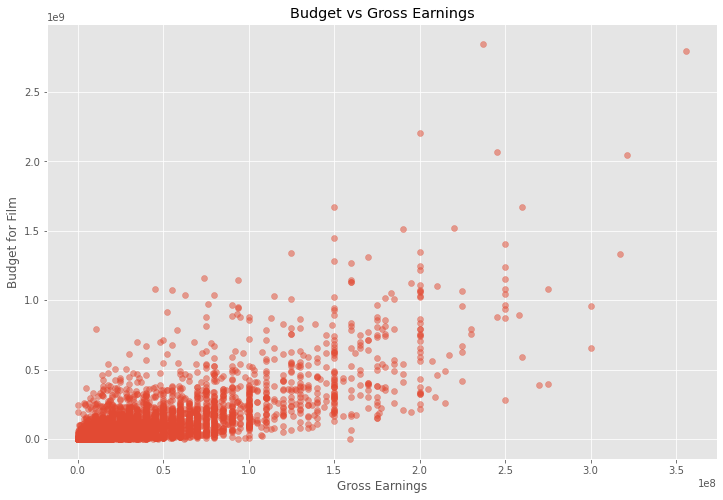

In [47]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [48]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

In [50]:
df_numerized.corr(method='pearson')

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget       0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross        0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   
Year        -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released     0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director     0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget       0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross        0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
yearcorrect  0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.015682   
Year         0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.015682   

                gross   company   runtime  yearcorrect      Year  
name         0.005533  0.009211  0.010392    -0.011725 -0.011725  
rating      -0.107339 -0.032943  0.062145     0.013475  0.013475  
genre       -0.235650 -0.071067 -0.052711     0.028397  0.028397  
year         0.257486 -0.010431  0.120811    -0.001562 -0.001562  
released     0.001659 -0.010474  0.000868     0.993694  0.993694  
score        0.186258  0.001030  0.399451     0.040993  0.040993  
votes        0.630757  0.133204  0.309212     0.017337  0.017337  
director    -0.014441  0.004404  0.017624    -0.000105 -0.000105  
writer      -0.023519  0.005646 -0.003511    -0.002892 -0.002892  
star        -0.002717  0.012442  0.010174     0.015406  0.015406  
country      0.092129  0.095548 -0.078412    -0.022277 -0.022277  
budget       0.740395  0.173214  0.320447     0.015682  0.015682  
gross        1.000000  0.154840  0.245216     0.002946  0.002946  
company      0.154840  1.000000  0.034402    -0.010726 -0.010726  
runtime      0.245216  0.034402  1.000000     0.000410  0.000410  
yearcorrect  0.002946 -0.010726  0.000410     1.000000  1.000000  
Year         0.002946 -0.010726  0.000410     1.000000  1.000000

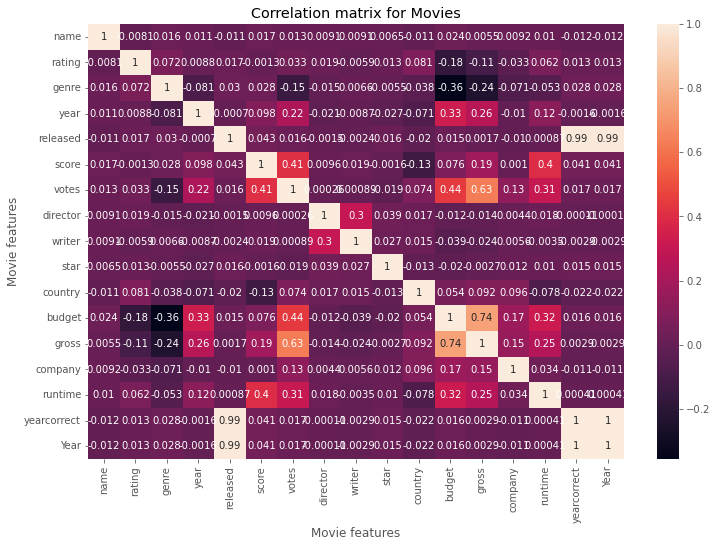

In [51]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [54]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

C:\Users\kami\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kami\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kami\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kami\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kami\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.4% of the points cann

KeyboardInterrupt: 

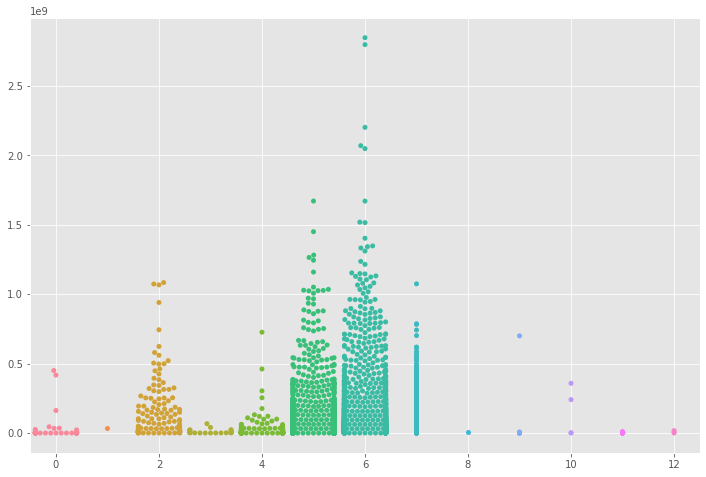

In [56]:
sns.swarmplot(x="rating", y="gross", data=df)

In [ ]:

sns.stripplot(x="rating", y="gross", data=df)